In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [46]:
water_pump = pd.read_csv("./Data/tanzanian_water_pumps.csv")

In [47]:
water_pump.head()

,Unnamed: 0,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [48]:
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59400 non-null  int64  
 1   id                     59400 non-null  int64  
 2   status_group           59400 non-null  object 
 3   amount_tsh             59400 non-null  float64
 4   date_recorded          59400 non-null  object 
 5   funder                 55765 non-null  object 
 6   gps_height             59400 non-null  int64  
 7   installer              55745 non-null  object 
 8   longitude              59400 non-null  float64
 9   latitude               59400 non-null  float64
 10  wpt_name               59400 non-null  object 
 11  num_private            59400 non-null  int64  
 12  basin                  59400 non-null  object 
 13  subvillage             59029 non-null  object 
 14  region                 59400 non-null  object 
 15  re

In [49]:
drop_cols =  ["Unnamed: 0", "id", "wpt_name", "num_private", "scheme_name", "recorded_by"]

In [50]:
water_pump.drop(drop_cols, axis=1, inplace=True)
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   basin                  59400 non-null  object 
 9   subvillage             59029 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  int64  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  object 
 14  ward                   59400 non-null  object 
 15  po

In [51]:
for col_name in water_pump.columns[18:34]:
    print(water_pump[col_name].value_counts())

True     38852
False    17492
Name: permit, dtype: int64
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   

extraction_type: 5 dfferent other groups, two india mark groups (with research we find these are types of pumps, so going to keep. so drop in favor of extraction_type_grooup.  

extraction_type_class is more macro but lose the manufacturer breakdown(this could be helpful info)

management: "other - school" rename school 

management_group: is good

payment vs. payment_type are the same. keep payment

water_quality and quality_group are similar: the quality_group just groups the salty and flouride together, soft is same as good. because low value counts in water_quality use quality_group.

quantity and quantity_group is exact same so keep quantity

source and source_type are the same except source_type doe NaN for unknown and groups lake/river. keep source

source_class has 278 unknowns...drop missing rows? check to see if the unknowns line up with the status 

water_point_type and water_point_type_group: 7 obs for dam...move these to other category. keep water_point_type because standpoints (multiple versus single seems to matter for water quality according to outside reserch) drop the 7 dam. 


drop_cols ["extraction_type", "payment_type", "water_quality", "quantity_group", "source_type", "water_point_type_group"]




In [52]:
water_pump.isnull().sum()

status_group                0
amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
subvillage                371
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3334
scheme_management        3877
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_cla

In [53]:
#Data cleaning: management change "other - school" to "school"
water_pump["management"].replace("other - school", "school", inplace=True)
water_pump["management"].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
school                 99
trust                  78
Name: management, dtype: int64

In [54]:
# "source_class" had unknown values. Looked into where they fell. 
water_pump["source_class"].groupby(water_pump["status_group"]).value_counts(normalize=True)

status_group             source_class
functional               groundwater     0.769863
                         surface         0.225239
                         unknown         0.004898
functional needs repair  groundwater     0.634932
                         surface         0.363910
                         unknown         0.001158
non functional           groundwater     0.798195
                         surface         0.196767
                         unknown         0.005039
Name: source_class, dtype: float64

Most of the unknown are split between function and nonfunctional meaning we could drop the unknown values if we wanted to. 

In [55]:
water_pump["waterpoint_type_group"].groupby(by=water_pump["status_group"]).value_counts(normalize=True)

status_group             waterpoint_type_group
functional               communal standpipe       0.618773
                         hand pump                0.334945
                         other                    0.026039
                         improved spring          0.017452
                         cattle trough            0.002604
                         dam                      0.000186
functional needs repair  communal standpipe       0.673616
                         hand pump                0.238360
                         other                    0.067871
                         improved spring          0.019690
                         cattle trough            0.000463
non functional           communal standpipe       0.515072
                         hand pump                0.247722
                         other                    0.229890
                         improved spring          0.005959
                         cattle trough            0.001314
         

In [56]:
for col_name in water_pump.columns[18:34]:
    print(water_pump[col_name].groupby(by=water_pump["status_group"]).value_counts(normalize=True))

status_group             permit
functional               True      0.704276
                         False     0.295724
functional needs repair  True      0.671397
                         False     0.328603
non functional           True      0.672186
                         False     0.327814
Name: permit, dtype: float64
status_group    construction_year
functional      0                    0.327196
                2010                 0.062711
                2008                 0.057007
                2009                 0.054992
                2000                 0.039648
                                       ...   
non functional  1964                 0.001402
                1962                 0.000964
                1961                 0.000701
                1966                 0.000482
                1965                 0.000307
Name: construction_year, Length: 164, dtype: float64
status_group             extraction_type          
functional               gravit

status_group             source_type         
functional               spring                  0.328342
                         shallow well            0.258037
                         borehole                0.183484
                         river/lake              0.174432
                         rainwater harvesting    0.042965
                         dam                     0.007843
                         other                   0.004898
functional needs repair  spring                  0.295576
                         river/lake              0.285615
                         shallow well            0.221682
                         borehole                0.117674
                         rainwater harvesting    0.072736
                         dam                     0.005559
                         other                   0.001158
non functional           shallow well            0.330485
                         borehole                0.241938
                         s

In [57]:
water_pump["amount_tsh"].groupby(by=water_pump["status_group"]).mean()

status_group
functional                 461.798235
functional needs repair    267.071577
non functional             123.481230
Name: amount_tsh, dtype: float64

In [58]:
#adding more columns to drop
more_drop_cols = ["extraction_type", "payment_type", "water_quality", 
                  "quantity_group", "source_type", "waterpoint_type_group",
                 "subvillage", "district_code", "ward", "funder", "longitude", "latitude",
                 "installer"]
water_pump.drop(more_drop_cols, axis=1, inplace=True)
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   region_code            59400 non-null  int64  
 7   lga                    59400 non-null  object 
 8   population             59400 non-null  int64  
 9   public_meeting         56066 non-null  object 
 10  scheme_management      55523 non-null  object 
 11  permit                 56344 non-null  object 
 12  construction_year      59400 non-null  int64  
 13  extraction_type_group  59400 non-null  object 
 14  extraction_type_class  59400 non-null  object 
 15  ma

In [59]:
#region_code is an integer right now but should be a string. 
water_pump["region_code"] = water_pump["region_code"].astype(str)


In [60]:
#changing construction_year 0s to NaN to create new column saying whether a column is missing or not
water_pump["construction_year"].replace(to_replace=0, value=np.nan, inplace=True)
water_pump["construction_year"].value_counts()

2010.0    2645
2008.0    2613
2009.0    2533
2000.0    2091
2007.0    1587
2006.0    1471
2003.0    1286
2011.0    1256
2004.0    1123
2012.0    1084
2002.0    1075
1978.0    1037
1995.0    1014
2005.0    1011
1999.0     979
1998.0     966
1990.0     954
1985.0     945
1996.0     811
1980.0     811
1984.0     779
1982.0     744
1994.0     738
1972.0     708
1974.0     676
1997.0     644
1992.0     640
1993.0     608
2001.0     540
1988.0     521
1983.0     488
1975.0     437
1986.0     434
1976.0     414
1970.0     411
1991.0     324
1989.0     316
1987.0     302
1981.0     238
1977.0     202
1979.0     192
1973.0     184
2013.0     176
1971.0     145
1960.0     102
1967.0      88
1963.0      85
1968.0      77
1969.0      59
1964.0      40
1962.0      30
1961.0      21
1965.0      19
1966.0      17
Name: construction_year, dtype: int64

In [61]:
#creating new column for missing construction year
water_pump["unknown_construction_yr"] = water_pump["construction_year"].isnull()
water_pump["unknown_construction_yr"].value_counts()

False    38691
True     20709
Name: unknown_construction_yr, dtype: int64

In [62]:
#Move the one None value to Other
water_pump["scheme_management"]= water_pump["scheme_management"].replace("None", "Other")
water_pump["scheme_management"].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 767
SWC                    97
Trust                  72
Name: scheme_management, dtype: int64

In [63]:
#Create new column of age at inspection. 
water_pump["age_at_inspection"] = water_pump["date_recorded"].str[:4].astype(int) - water_pump["construction_year"]
water_pump["age_at_inspection"].value_counts()

 3.0     2740
 1.0     2303
 2.0     2129
 5.0     1980
 4.0     1890
 13.0    1869
 7.0     1404
 6.0     1381
 11.0    1352
 14.0    1160
 8.0     1160
 33.0    1120
 15.0     993
 23.0     905
 10.0     868
 16.0     826
 9.0      814
 19.0     766
 27.0     762
 18.0     754
 28.0     709
 31.0     709
 35.0     647
 17.0     636
 39.0     601
 37.0     600
 26.0     589
 0.0      588
 25.0     583
 21.0     578
 29.0     564
 12.0     559
 20.0     541
 41.0     488
 30.0     359
 43.0     356
 38.0     351
 36.0     325
 22.0     323
 24.0     261
 40.0     233
 34.0     184
 32.0     174
 53.0      91
 42.0      90
 50.0      84
 45.0      66
 46.0      48
 44.0      47
 48.0      41
 51.0      31
 49.0      25
 47.0      14
 52.0      11
-5.0        3
-4.0        2
-3.0        1
-7.0        1
-1.0        1
-2.0        1
Name: age_at_inspection, dtype: int64

In [64]:
water_pump["water_per_person"] = water_pump["amount_tsh"] / water_pump["population"]
water_pump["water_per_person"].value_counts()

0.000000     21283
inf           1025
0.200000       430
50.000000      421
3.333333       396
             ...  
0.153257         1
2.092050         1
0.279330         1
0.851064         1
1.524390         1
Name: water_per_person, Length: 1915, dtype: int64

In [65]:
#Clean up the null values in our final data set
water_pump["public_meeting"].replace(to_replace=np.nan, value="Unknown", inplace=True)
water_pump["scheme_management"].replace(to_replace=np.nan, value="Unknown", inplace=True)
water_pump["permit"].replace(to_replace=np.nan, value="Unknown", inplace=True)

In [66]:
water_pump.isnull().sum()

status_group                   0
amount_tsh                     0
date_recorded                  0
gps_height                     0
basin                          0
region                         0
region_code                    0
lga                            0
population                     0
public_meeting                 0
scheme_management              0
permit                         0
construction_year          20709
extraction_type_group          0
extraction_type_class          0
management                     0
management_group               0
payment                        0
quality_group                  0
quantity                       0
source                         0
source_class                   0
waterpoint_type                0
unknown_construction_yr        0
age_at_inspection          20709
water_per_person           20356
dtype: int64

In [67]:
#Encode the y variable using label encoder
le = LabelEncoder()
water_pump["status_group"] = le.fit_transform(water_pump["status_group"])
water_pump.head()

,status_group,amount_tsh,date_recorded,gps_height,basin,region,region_code,lga,population,public_meeting,...,management_group,payment,quality_group,quantity,source,source_class,waterpoint_type,unknown_construction_yr,age_at_inspection,water_per_person
0,0,6000.0,2011-03-14,1390,Lake Nyasa,Iringa,11,Ludewa,109,True,...,user-group,pay annually,good,enough,spring,groundwater,communal standpipe,False,12.0,55.045872
1,0,0.0,2013-03-06,1399,Lake Victoria,Mara,20,Serengeti,280,Unknown,...,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,False,3.0,0.000000
2,0,25.0,2013-02-25,686,Pangani,Manyara,21,Simanjiro,250,True,...,user-group,pay per bucket,good,enough,dam,surface,communal standpipe multiple,False,4.0,0.100000
3,2,0.0,2013-01-28,263,Ruvuma / Southern Coast,Mtwara,90,Nanyumbu,58,True,...,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,False,27.0,0.000000
4,0,0.0,2011-07-13,0,Lake Victoria,Kagera,18,Karagwe,0,True,...,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,True,NaN,NaN


In [68]:
water_pump["status_group"].value_counts(normalize=True)

0    0.543081
2    0.384242
1    0.072677
Name: status_group, dtype: float64

In [69]:
water_pump.drop(["date_recorded", "construction_year", "population"], axis=1, inplace=True)

In [29]:
X = water_pump.drop(["status_group"], axis=1)
y = water_pump["status_group"]

In [30]:
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status_group             59400 non-null  int64  
 1   amount_tsh               59400 non-null  float64
 2   gps_height               59400 non-null  int64  
 3   basin                    59400 non-null  object 
 4   region                   59400 non-null  object 
 5   region_code              59400 non-null  object 
 6   lga                      59400 non-null  object 
 7   public_meeting           56066 non-null  object 
 8   scheme_management        55523 non-null  object 
 9   permit                   56344 non-null  object 
 10  extraction_type_group    59400 non-null  object 
 11  extraction_type_class    59400 non-null  object 
 12  management               59400 non-null  object 
 13  management_group         59400 non-null  object 
 14  payment               

In [36]:
water_pump.isnull().sum()

status_group                   0
amount_tsh                     0
gps_height                     0
basin                          0
region                         0
region_code                    0
lga                            0
public_meeting              3334
scheme_management           3877
permit                      3056
extraction_type_group          0
extraction_type_class          0
management                     0
management_group               0
payment                        0
quality_group                  0
quantity                       0
source                         0
source_class                   0
waterpoint_type                0
unknown_construction_yr        0
age_at_inspection          20709
water_per_person           20356
dtype: int64

In [31]:
#Break into numeric and categorical columns 
numeric_cols = ["amount_tsh", "gps_height", 
                "age_at_inspection", "water_per_person"]
cat_cols =["basin", "region", "region_code", "lga", "public_meeting", "scheme_management", "permit",
          "extraction_type_group", "extraction_type_class", "management", "management_group", "payment", "quality_group",
          "quantity", "source", "source_class", "waterpoint_type", "unknown_construction_yr"]



## Pipeline 

In [ ]:
# We'll throw these mini-pipelines into our ColumnTransformer.

subpipe_num = Pipeline(steps=[("num_impute", SimpleImputer(strategy="mean")),("ss", StandardScaler())])
subpipe_cat = Pipeline(steps=[("cat_impute", 
                              ("ohe", OneHotEncoder(sparse=False, handle_unknown="ignore"))])
subpipe_ord = Pipeline(steps=[("ord_encode")])

In [ ]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
#Instantiate Dummy Classifier 

dummy = DummyClassifier(strategy = "most_frequent", random_state=42)

#Fit dummy classifier to X_train, y_train
dummy_model = dummy.fit(X_train, y_train)

#Accuracy Score for dummy classifier
y_pred_dummy = dummy_model.predict(X_test)
accuracy_score(y_pred_dummy, y_test)

0.5453198653198653

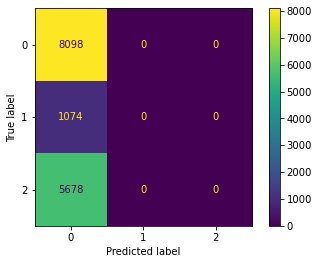

In [35]:
#Confusion Matrix for Dummy
plot_confusion_matrix(estimator=dummy_model, X=X_test, y_true = y_test);

The majority class (functional water pumps) is 54% of the data, so when the model predicts the majority class it will be correct 54% of the time. 